# PCA (Implementation)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools

In [26]:
data = pd.read_excel('C:\\Users\\Galia\\Desktop\\labs\\RETURNS.xlsx')
X = data[['agn']]
XX = X.as_matrix()
XX = np.hstack(((12*XX[:, 0]*XX[:, 0] + np.random.randn(XX.shape[0])*0.5).reshape(2394, 1), XX))
print(XX)
print(XX.shape)

[[ 12.74406005   1.01869447]
 [ 12.35867387   1.00450016]
 [ 12.22319623   1.01045413]
 ..., 
 [ 11.38404598   0.99537343]
 [ 12.2756146    1.02169101]
 [ 12.07077924   0.98700173]]
(2394, 2)


In [20]:
def PCA(X, n_eigen_val = None, accur_decim = 2, explained_variance = None, restore = False):
#1
#check the input data type
    if type(X).__name__ != 'ndarray':
        X = X.as_matrix()
    n, d = X.shape

#2
#normalize data

    norm_params = np.zeros((2, d))
    norm_params[0] = X.mean(axis = 0)
    #unbiased estimator of the variance
    norm_params[1] = X.std(axis = 0, ddof = 1)
    norm_X = (X - norm_params[0])/norm_params[1]
#3
#count covariance matrix

    cov = np.dot(norm_X.T, norm_X) / n
#4
#count the eigen values and eigen vectors

    e_val, e_vect = np.linalg.eig(cov)
    #in general, eigenvalues could be complex numbers
    #get the absolute values for comparing with the real numbers
    e_val = np.absolute(e_val)
    #sort in descending order eigenvalues and 
    #write the corresponding position in ind
    ind = np.argsort(-e_val)
    #the same for eigenvectors
    e_vect = e_vect[:, ind]
    #convert every vector into float (complex numbers also converted - the aim)
    e_vect = e_vect.astype(float)
#5
#Chose best choise according to proportion of variance
#and number of eigenvalues

    propor_var = e_val / np.sum(e_val)
    #comulative proportion of variance
    com_prop_var = np.cumsum(propor_var * 100)
    int_com_prop = com_prop_var

    try:
#6
#check the consumer`s input
    #if no parameters were inputed
        if (n_eigen_val == None and explained_variance == None):
            ind_com = min([i for i in range(len(int_com_prop)) if int_com_prop[i] >= 90.])

            e_vect_reduced = e_vect[:, :(ind_com + 1)]
            com_prop_reduced = 90.
            print("No amount of components were chosen. The output was counted for 90% explained variance")

    #if explained variance was given
        if (n_eigen_val == None and explained_variance != None):
    #check if explained variance was given less than actual was
            if explained_variance < np.min(int_com_prop):
                print("Explained variance is bigger than the input value. There was used the smallest one")

            ind_com = min([i for i in range(len(int_com_prop)) if int_com_prop[i] >= explained_variance])
            e_vect_reduced = e_vect[:, :(ind_com + 1)]
            com_prop_reduced = com_prop_var[ind_com]

    #if number of components were given
        if (n_eigen_val != None and explained_variance == None):
            e_vect_reduced = e_vect[:, : n_eigen_val]
            com_prop_reduced = com_prop_var[n_eigen_val-1]

    #if everythig was given
        if (n_eigen_val != None and explained_variance != None):
            l = [i for i in range(len(int_com_prop)) if int_com_prop[i] == explained_variance]
            #if explained variance is in range of actual variance
            if l != []:
                e_vect_reduced = e_vect[:, : n_eigen_val]
                com_prop_reduced = com_prop_var[n_eigen_val-1]

            else:
                print("The principal component`s amount is not respective to explained variance. \n The proportion of explained variance was used.")
                ind_com = min([i for i in range(len(int_com_prop)) if int_com_prop[i] >= explained_variance])
                e_vect_reduced = e_vect[:, :(ind_com + 1)]
                com_prop_reduced = explained_variance
    except:
        print("Not suitable parameters")
    else:
        X_new = np.dot(norm_X, e_vect_reduced)
        if restore == False:
            return X_new, e_vect_reduced, com_prop_reduced
        else:
            X_rest = np.dot(X_new, e_vect_reduced.T)
            X_rest = (X_rest * norm_params[1]) + norm_params[0]
            return X_rest, e_vect_reduced, com_prop_reduced

# Visualisation

## My data

In [27]:
restore_X = PCA(XX, n_eigen_val = 1, restore=True)
rest_X = restore_X[0]
print(restore_X[2])

18.4631947645


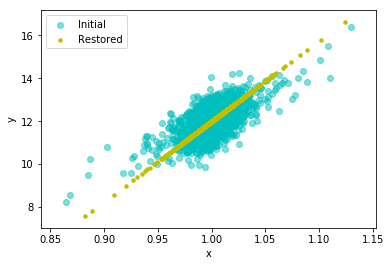

In [28]:
plt.figure()
plt.scatter(XX[:, 1], XX[:, 0], color='c', label='Initial', alpha = 0.5)
plt.scatter(rest_X[:, 1], rest_X[:, 0], color='y', label='Restored', s = 12)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Given data  

In [9]:
points = 10
X = np.zeros((points,2))
x = np.arange(1,points+1)
y = 4 * x *x + np.random.randn(points)*2
X[:,1] = y
X[:,0] = x

In [12]:
n_X = PCA(X, n_eigen_val=1, restore=True)[0]

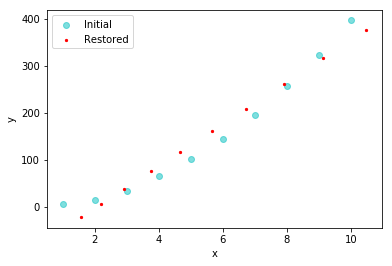

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='c', label='Initial', alpha = 0.5)
plt.scatter(n_X[:, 0], n_X[:, 1], color='red', label='Restored', s = 5)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
from PIL import Image
# read image 
img = Image.open('C:\\Users\\Galia\\Dropbox\\DataRoot University\\5mod\\PCA\\pct.jpg')
# black & white transformation
img = img.convert('L')

# create numpy array
img_X = (np.copy(np.asarray(img))).astype(float)

# dimension restoring
X_restored_img = PCA(img_X, explained_variance= 50, restore=True)

# create from restored array
restored_img = Image.fromarray(X_restored_img[0].astype(int))
print(X_restored_img[2])

img.show()
restored_img.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


1
Explained variance is bigger than the input value. There was used the smallest one
78.7274578579
